## MODELS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import m2cgen as m2c
import json

## PREPROCESSING the Collected data

In [2]:
def load_activity_data(filename, label):
    df = pd.read_csv(filename)
    df['activity'] = label
    return df


In [3]:
walking = load_activity_data("walking_bhikshapathi.csv", "walking")
walking = walking[['Ax_mean', 'Ay_mean', 'Az_mean', 'Gx_mean', 'Gy_mean', 'Gz_mean','Mx_mean', 'My_mean', 'Mz_mean', 'activity']]
walking = walking.dropna()  
walking.columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz','mx', 'my', 'mz', 'activity']
print(walking.head())

        ax       ay       az       gx       gy       gz        mx        my  \
0 -0.10593  0.89525  0.06266  1.14929 -2.28821  4.67102  19.89038  38.00574   
1 -0.11290  0.91129  0.05403  0.69885 -2.05200  3.46191  20.53369  38.03967   
2 -0.11550  0.92828  0.04339  0.70862 -2.28394  3.99353  21.20789  38.14966   
3 -0.11410  0.93876  0.03308  1.10779 -2.21619  4.84253  21.77649  38.01025   
4 -0.11759  0.95529  0.02174  0.82275 -2.62024  3.20801  22.42456  38.00806   

         mz activity  
0  20.12830  walking  
1  20.27673  walking  
2  20.37988  walking  
3  20.45911  walking  
4  20.51697  walking  


In [4]:
swinging = load_activity_data("swinging_bhikshapathi.csv", "swinging")
swinging = swinging[['Ax_mean', 'Ay_mean', 'Az_mean', 'Gx_mean', 'Gy_mean', 'Gz_mean','Mx_mean', 'My_mean', 'Mz_mean', 'activity']]
swinging = swinging.dropna()
swinging.columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz','mx', 'my', 'mz', 'activity']
print(swinging.head())

        ax       ay       az       gx       gy       gz       mx        my  \
0 -0.98528  0.18769  0.13120  7.18506  1.96533  0.98816 -1.73291  55.87415   
1 -0.99346  0.19181  0.12181  7.35168  1.64917  0.88989 -2.06897  56.03162   
2 -1.00398  0.19399  0.11306  7.31079  1.61743  0.75317 -2.40540  56.17700   
3 -1.01411  0.19627  0.10431  7.28577  1.65344  0.84595 -2.72925  56.31140   
4 -1.02325  0.19802  0.09534  7.19543  2.31628  0.88684 -3.04773  56.46594   

         mz  activity  
0  31.45117  swinging  
1  31.69922  swinging  
2  31.94214  swinging  
3  32.17883  swinging  
4  32.47607  swinging  


In [5]:
writing = load_activity_data("writing_bhikshapathi.csv", "writing")
writing = writing[['Ax_mean', 'Ay_mean', 'Az_mean', 'Gx_mean', 'Gy_mean', 'Gz_mean','Mx_mean', 'My_mean', 'Mz_mean', 'activity']]
writing = writing.dropna()
writing.columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz','mx', 'my', 'mz', 'activity']
print(writing.head())

        ax       ay       az       gx       gy       gz        mx        my  \
0 -0.69261  0.63786 -0.31302 -0.78125  4.69055  5.44800 -13.74365  65.25305   
1 -0.69386  0.63865 -0.30906 -0.65491  4.85474  5.37720 -13.70435  65.21497   
2 -0.69538  0.63976 -0.30454 -0.50964  4.72961  5.37842 -13.65601  65.15588   
3 -0.69693  0.64034 -0.30164 -1.00403  4.47632  4.93103 -13.62073  65.11353   
4 -0.69671  0.64030 -0.29894 -1.20789  4.33289  4.67041 -13.59338  65.07410   

         mz activity  
0  27.71106  writing  
1  27.82996  writing  
2  27.95935  writing  
3  28.08386  writing  
4  28.17212  writing  


In [6]:
typing = load_activity_data("typing_bhikshapathi.csv", "typing")
typing = typing[['Ax_mean', 'Ay_mean', 'Az_mean', 'Gx_mean', 'Gy_mean', 'Gz_mean','Mx_mean', 'My_mean', 'Mz_mean', 'activity']]
typing = typing.dropna()
typing.columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz','mx', 'my', 'mz', 'activity']
print(typing.head())

        ax       ay       az       gx       gy       gz       mx        my  \
0 -0.22470 -0.09584 -0.96965  3.76526  3.69751  5.68848  6.50684  23.88757   
1 -0.22691 -0.08893 -0.96946  3.85925  3.54797  5.33813  4.99451  25.18481   
2 -0.23192 -0.08390 -0.96964  3.66333  3.84155  5.26978  3.17737  26.60339   
3 -0.23548 -0.07883 -0.97119  3.66394  3.88855  5.31921  1.18066  28.04663   
4 -0.23861 -0.07403 -0.97237  3.67493  3.90869  5.29480 -1.09949  29.63806   

        mz activity  
0 -9.02136   typing  
1 -7.12366   typing  
2 -5.11682   typing  
3 -3.14856   typing  
4 -1.09924   typing  


In [7]:
sitting = load_activity_data("sitting_bhikshapathi.csv", "sitting")
sitting = sitting[['Ax_mean', 'Ay_mean', 'Az_mean', 'Gx_mean', 'Gy_mean', 'Gz_mean','Mx_mean', 'My_mean', 'Mz_mean', 'activity']]
sitting = sitting.dropna()
sitting.columns = ['ax', 'ay', 'az', 'gx', 'gy', 'gz','mx', 'my', 'mz', 'activity']
print(sitting.head())

        ax       ay       az       gx       gy       gz        mx        my  \
0 -0.02529  0.00442  0.96346  1.05591  2.73682  1.70532 -19.88586  30.24597   
1 -0.02526  0.00444  0.96367  1.05530  2.73560  1.70593 -19.88647  30.24695   
2 -0.02528  0.00443  0.96380  1.05347  2.73621  1.70654 -19.88879  30.24695   
3 -0.02529  0.00442  0.96391  1.05408  2.73682  1.70776 -19.88965  30.24561   
4 -0.02531  0.00443  0.96399  1.05530  2.73621  1.70715 -19.88770  30.24866   

        mz activity  
0  7.33740  sitting  
1  7.31921  sitting  
2  7.31946  sitting  
3  7.31873  sitting  
4  7.31238  sitting  


## CONCATENATE ALL THE LABELS

In [8]:
# Combine all data into one DataFrame.
df = pd.concat([walking,typing,writing,swinging,sitting], ignore_index=True)
print("Combined Data Sample:")
print(swinging.head())

Combined Data Sample:
        ax       ay       az       gx       gy       gz       mx        my  \
0 -0.98528  0.18769  0.13120  7.18506  1.96533  0.98816 -1.73291  55.87415   
1 -0.99346  0.19181  0.12181  7.35168  1.64917  0.88989 -2.06897  56.03162   
2 -1.00398  0.19399  0.11306  7.31079  1.61743  0.75317 -2.40540  56.17700   
3 -1.01411  0.19627  0.10431  7.28577  1.65344  0.84595 -2.72925  56.31140   
4 -1.02325  0.19802  0.09534  7.19543  2.31628  0.88684 -3.04773  56.46594   

         mz  activity  
0  31.45117  swinging  
1  31.69922  swinging  
2  31.94214  swinging  
3  32.17883  swinging  
4  32.47607  swinging  


## DATA VISULIZATION FOR FEATURE EXTRACTION

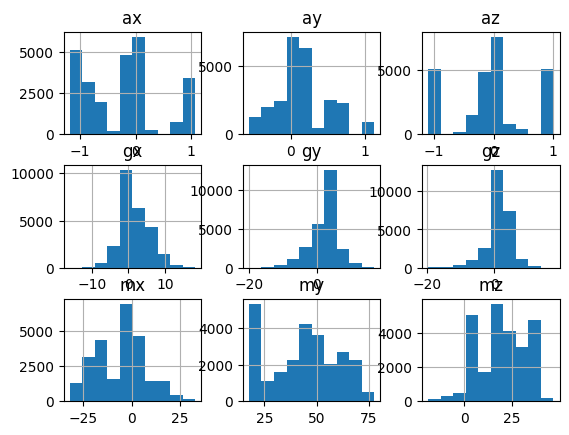

In [9]:
# VISUALIZE DIFFERNT DISTRIBUTIONS
df.hist()
plt.show()

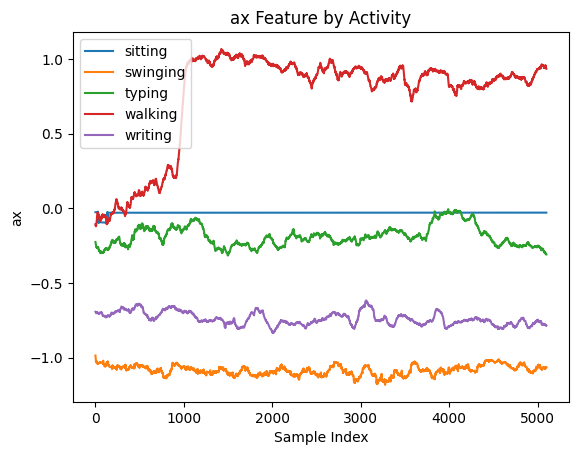

In [10]:
plt.figure()
for activity, group in df.groupby("activity"):
    plt.plot(group["ax"].values, label=activity)
plt.title("ax Feature by Activity")
plt.xlabel("Sample Index")
plt.ylabel("ax")
plt.legend()
plt.show()


## FEATURE EXTRACTION AND ENCODING THE LABELS

In [11]:
# feature_cols = [col for col in df.columns if col not in ["Seq", "activity"]]

feature_cols = ["ax", "ay", "az", "gx", "gy", "gz","mx", "my", "mz"]

X = df[feature_cols]
y = df["activity"]

# Encode the activity labels as integers (this makes the exported model easier to use)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Encoded Activity Labels:", dict(zip(le.classes_, le.transform(le.classes_))))

Encoded Activity Labels: {'sitting': np.int64(0), 'swinging': np.int64(1), 'typing': np.int64(2), 'walking': np.int64(3), 'writing': np.int64(4)}


## SPLIT THE DATA AS TEST AND TRAIN

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## TRAIN THE DECISION TREE

In [13]:
dt_params = {'max_depth': [None, 5, 10, 15]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_


## TRAIN RANDOM FOREST AND HYPARAMETER TUNING

In [14]:
rf_params = {'n_estimators': [50, 100], 'max_depth': [None, 5, 10, 15]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
print("Random Forest Best Parameters:", rf_grid.best_params_)


Random Forest Best Parameters: {'max_depth': None, 'n_estimators': 50}


## TRAIN THE XGBOOOST

In [15]:

from xgboost import XGBRFClassifier
xgb_params = {'n_estimators': [50, 100], 'max_depth': [3, 5, 7]}
xgb_grid = GridSearchCV(XGBRFClassifier(random_state=42), xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
print("XGBRFClassifier Best Parameters:", xgb_grid.best_params_)

XGBRFClassifier Best Parameters: {'max_depth': 3, 'n_estimators': 50}


## FINDING THE ACCURACY AND BEST MODEL

In [16]:
# Evaluate Models on the test set.
# You can add additional models to the dictionary.
models = {
    "Decision Tree": dt_best,
    "Random Forest": rf_best,
    "XGBRFClassifier": xgb_best
}
 # Add additional models as needed
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

best_model_name, best_model = max(models.items(), key=lambda item: accuracy_score(y_test, item[1].predict(X_test)))
best_acc = accuracy_score(y_test, best_model.predict(X_test))
print("Selected Best Model:", best_model_name, "with Accuracy:", best_acc)

Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
XGBRFClassifier Accuracy: 1.0000
Selected Best Model: Decision Tree with Accuracy: 1.0


## IMPORT THE BEST MODEL

In [ ]:
model_code = m2c.export_to_python(best_model)

# Save the exported model to a file.
with open("Predict.py", "w") as f:
    f.write(model_code)
print("Exported model saved to exported_model.py")

# Save the label mapping (integer label to activity name) for deployment.
label_mapping = dict(zip(range(len(le.classes_)), le.classes_))
with open("label_mapping.json", "w") as f:
    json.dump(label_mapping, f)
print("Label mapping saved to label_mapping.json")


Exported model saved to exported_model.py
Label mapping saved to label_mapping.json
